In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from pyspark.ml.linalg import Vectors
from pandas import Series,DataFrame
import pandas as pd

In [2]:
X=[(1,1), (2,2), (3, 3), (10,10), (11,11), (12,12)]

label=[1,1,1,0,0,0]

print(X)
print(label)

[(1, 1), (2, 2), (3, 3), (10, 10), (11, 11), (12, 12)]
[1, 1, 1, 0, 0, 0]


In [3]:
x1 = [a_tuple[0] for a_tuple in X]
x2 = [a_tuple[0] for a_tuple in X]
print(x1)

[1, 2, 3, 10, 11, 12]


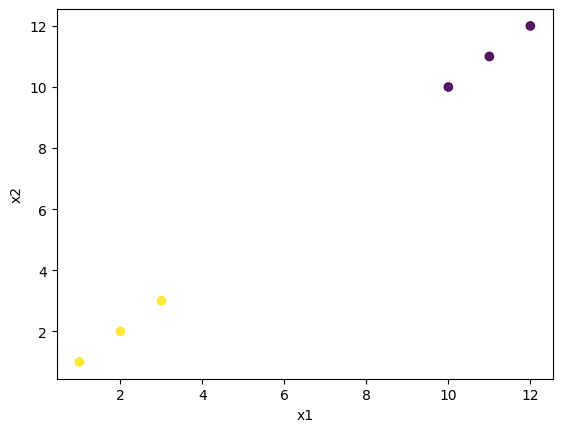

In [4]:
plt.scatter(x1,x2, c=label, alpha=0.9, label="Two Classes")
plt.xlabel("x1")
plt.ylabel("x2")

# plt.legend(loc='lower right')
plt.show()

In [5]:
# Now, let us fit a logistic regression model into this and test it on the train data. 
# this is using Scikit-learn to check our implementation
clf = LogisticRegression(fit_intercept=False, random_state=0).fit(X, label)
print(clf.predict(X))
clf.score(X, label)
print(clf.coef_)

print(clf.penalty)

[0 0 0 0 0 0]
[[-0.09347047 -0.09347047]]
l2


In [6]:
# Let us make a RDD in Spark 

# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable
import numpy as np
import pandas as pd
from pyspark.ml.linalg import Vectors


data = {'y':label, 'x':X}

df = DataFrame(data)
df

spark_df_from_pandas = spark.createDataFrame(df, schema=['y', 'x'])
spark_df_from_pandas.show()


# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable

trainRDD=spark_df_from_pandas.rdd.map(lambda x: (x[0], np.array(x[1]) ))
trainRDD.collect()


+---+--------+
|  y|       x|
+---+--------+
|  1|  {1, 1}|
|  1|  {2, 2}|
|  1|  {3, 3}|
|  0|{10, 10}|
|  0|{11, 11}|
|  0|{12, 12}|
+---+--------+



[(1, array([1, 1])),
 (1, array([2, 2])),
 (1, array([3, 3])),
 (0, array([10, 10])),
 (0, array([11, 11])),
 (0, array([12, 12]))]

In [7]:
from pyspark.mllib.classification import SVMWithSGD, SVMModel, LogisticRegressionWithLBFGS
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data

parsedData = trainRDD.map(lambda x: LabeledPoint(x[0], x[1]))
parsedData.take(2)

[LabeledPoint(1.0, [1.0,1.0]), LabeledPoint(1.0, [2.0,2.0])]

In [8]:

# Build the model
model = LogisticRegressionWithLBFGS.train(parsedData)

# Evaluating the model on training data
labelsAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))

labelsAndPreds.take(5)

24/07/17 12:58:04 WARN Instrumentation: [f76e5e31] Initial coefficients will be ignored! Its dimensions (1, 2) did not match the expected size (1, 2)
24/07/17 12:58:04 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


[(1.0, 0), (1.0, 0), (1.0, 0), (0.0, 0), (0.0, 0)]

In [9]:

# Build the model
model = SVMWithSGD.train(parsedData, iterations=100)

# Evaluating the model on training data
labelsAndPreds = parsedData.map(lambda p: (p.label, model.predict(p.features)))
labelsAndPreds.take(5)

[(1.0, 0), (1.0, 0), (1.0, 0), (0.0, 0), (0.0, 0)]